In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./CreditScoring.csv")
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
status_values = {
    1: "ok",
    2: "default",
    3: "unk"
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [6]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [7]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [8]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [9]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [10]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
seniority,4455.0,8.0,8.0,0.0,2.0,5.0,12.0,48.0
time,4455.0,46.0,15.0,6.0,36.0,48.0,60.0,72.0
age,4455.0,37.0,11.0,18.0,28.0,36.0,45.0,68.0
expenses,4455.0,56.0,20.0,35.0,35.0,51.0,72.0,180.0
income,4455.0,763317.0,8703625.0,0.0,80.0,120.0,166.0,99999999.0
assets,4455.0,1060341.0,10217569.0,0.0,0.0,3500.0,6000.0,99999999.0
debt,4455.0,404382.0,6344253.0,0.0,0.0,0.0,0.0,99999999.0
amount,4455.0,1039.0,475.0,100.0,700.0,1000.0,1300.0,5000.0
price,4455.0,1463.0,628.0,105.0,1118.0,1400.0,1692.0,11140.0


In [11]:
for col in ["income", "assets", "debt"]:
    df[col] = df[col].replace(to_replace=99999999, value=np.nan)

In [12]:
df.isnull().sum()

status        1
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [13]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
seniority,4455.0,8.0,8.0,0.0,2.0,5.0,12.0,48.0
time,4455.0,46.0,15.0,6.0,36.0,48.0,60.0,72.0
age,4455.0,37.0,11.0,18.0,28.0,36.0,45.0,68.0
expenses,4455.0,56.0,20.0,35.0,35.0,51.0,72.0,180.0
income,4421.0,131.0,86.0,0.0,80.0,120.0,165.0,959.0
assets,4408.0,5403.0,11573.0,0.0,0.0,3000.0,6000.0,300000.0
debt,4437.0,343.0,1246.0,0.0,0.0,0.0,0.0,30000.0
amount,4455.0,1039.0,475.0,100.0,700.0,1000.0,1300.0,5000.0
price,4455.0,1463.0,628.0,105.0,1118.0,1400.0,1692.0,11140.0


In [14]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=143)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=145)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = (df_train.status=="default").astype("int").values
y_val = (df_val.status=="default").astype("int").values
y_test = (df_test.status=="default").astype("int").values

In [20]:
del df_train["status"]
del df_val["status"]
del df_test["status"]

In [21]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,12,owner,24,36,married,no,fixed,60,243.0,6000.0,0.0,600,1376
1,1,rent,48,46,married,no,fixed,103,125.0,1500.0,0.0,1100,1408
2,19,owner,48,52,married,no,fixed,60,68.0,6000.0,0.0,850,1393
3,12,owner,60,28,single,yes,fixed,35,172.0,3000.0,2000.0,950,1184
4,5,rent,60,31,married,no,fixed,86,109.0,0.0,0.0,830,1700


### Decision Tree

In [25]:
def assess_risk(client):
    if client["records"] == "yes":
        if client["job"] == "parttime":
            return "default"
        else:
            return "ok"
    else:
        if client["assets"] > 6000:
            return "ok"
        else:
            return "default"

In [30]:
print(df_train.loc[0].to_dict())
print(assess_risk(df_train.loc[0].to_dict()))

print(df_train.loc[3].to_dict())
print(assess_risk(df_train.loc[3].to_dict()))

{'seniority': 12, 'home': 'owner', 'time': 24, 'age': 36, 'marital': 'married', 'records': 'no', 'job': 'fixed', 'expenses': 60, 'income': 243.0, 'assets': 6000.0, 'debt': 0.0, 'amount': 600, 'price': 1376}
default
{'seniority': 12, 'home': 'owner', 'time': 60, 'age': 28, 'marital': 'single', 'records': 'yes', 'job': 'fixed', 'expenses': 35, 'income': 172.0, 'assets': 3000.0, 'debt': 2000.0, 'amount': 950, 'price': 1184}
ok


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [41]:
train_dicts = df_train.fillna(0).to_dict(orient="records")

In [42]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [43]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'marital=divorced', 'marital=married',
       'marital=separated', 'marital=single', 'marital=widow', 'price',
       'records=no', 'records=yes', 'seniority', 'time'], dtype=object)

In [44]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
val_dicts = df_val.fillna(0).to_dict(orient="records")
X_val = dv.transform(val_dicts)

y_pred = dt_clf.predict_proba(X_val)[:,1]

In [50]:
roc_auc_score(y_val, y_pred)

0.6596384152110206

In [52]:
roc_auc_score(y_train, dt_clf.predict_proba(X_train)[:,1])

0.9999996418933244

In [53]:
# Overfitting in data

In [60]:
dt_clf_v2 = DecisionTreeClassifier(max_depth=3)
dt_clf_v2.fit(X_train, y_train)

score_train = roc_auc_score(y_train, dt_clf_v2.predict_proba(X_train)[:,1])
score_val = roc_auc_score(y_val, dt_clf_v2.predict_proba(X_val)[:,1])

print(f"Train AUC ROC: {round(score_train, 4)}")
print(f"Val AUC ROC: {round(score_val, 4)}")

Train AUC ROC: 0.762
Val AUC ROC: 0.755


In [63]:
from sklearn.tree import export_text

print(export_text(dt_clf_v2, feature_names=dv.get_feature_names()))

|--- seniority <= 5.50
|   |--- records=yes <= 0.50
|   |   |--- income <= 100.50
|   |   |   |--- class: 0
|   |   |--- income >  100.50
|   |   |   |--- class: 0
|   |--- records=yes >  0.50
|   |   |--- amount <= 1585.00
|   |   |   |--- class: 1
|   |   |--- amount >  1585.00
|   |   |   |--- class: 1
|--- seniority >  5.50
|   |--- records=no <= 0.50
|   |   |--- income <= 97.50
|   |   |   |--- class: 1
|   |   |--- income >  97.50
|   |   |   |--- class: 0
|   |--- records=no >  0.50
|   |   |--- income <= 93.50
|   |   |   |--- class: 0
|   |   |--- income >  93.50
|   |   |   |--- class: 0



c:\Users\soumy\anaconda3\envs\mlops\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Decision Tree Learning Algorithm - Best Split - Parameter Tuning

In [70]:
depths = range(1, 11)

for depth in depths:
    
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    score_train = roc_auc_score(y_train, dt.predict_proba(X_train)[:,1])
    score_val = roc_auc_score(y_val, dt.predict_proba(X_val)[:,1])
    print(f"Depth: {depth}")
    print(f"Train AUC ROC: {round(score_train, 4)}")
    print(f"Val AUC ROC: {round(score_val, 4)}")
    print("\n")

Depth: 1
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 2
Train AUC ROC: 0.7061
Val AUC ROC: 0.7054


Depth: 3
Train AUC ROC: 0.762
Val AUC ROC: 0.755


Depth: 4
Train AUC ROC: 0.795
Val AUC ROC: 0.7704


Depth: 5
Train AUC ROC: 0.8288
Val AUC ROC: 0.7643


Depth: 6
Train AUC ROC: 0.8629
Val AUC ROC: 0.7338


Depth: 7
Train AUC ROC: 0.8931
Val AUC ROC: 0.7171


Depth: 8
Train AUC ROC: 0.924
Val AUC ROC: 0.7003


Depth: 9
Train AUC ROC: 0.9508
Val AUC ROC: 0.6845


Depth: 10
Train AUC ROC: 0.9698
Val AUC ROC: 0.6844




In [77]:
score = []
depths = range(1, 11)
sample_leafs = range(1, 500, 10)

for depth in depths:
    for leaf in sample_leafs:
    
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
        dt.fit(X_train, y_train)
        score_train = roc_auc_score(y_train, dt.predict_proba(X_train)[:,1])
        score_val = roc_auc_score(y_val, dt.predict_proba(X_val)[:,1])
        print(f"Depth: {depth}")
        print(f"Depth: {leaf}")
        print(f"Train AUC ROC: {round(score_train, 4)}")
        print(f"Val AUC ROC: {round(score_val, 4)}")
        print("\n")
        score.append((depth, leaf, score_val))

Depth: 1
Depth: 1
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 11
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 21
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 31
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 41
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 51
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 61
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 71
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 81
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 91
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 101
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 111
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 121
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 131
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 141
Train AUC ROC: 0.6485
Val AUC ROC: 0.6268


Depth: 1
Depth: 151
Train AUC ROC: 0.6485
Val AUC R

In [73]:
columns = ["max_depth", "min_samples_leaf", "auc_roc"]
df_scores = pd.DataFrame(score, columns=columns)

In [79]:
df_scores_pivot = df_scores.pivot(index="min_samples_leaf", columns="max_depth", values=["auc_roc"])
df_scores_pivot.round(3)


auc_roc                                                   \
max_depth             1      2      3      4      5      6      7      8    
min_samples_leaf                                                            
1                  0.627  0.705  0.755  0.770  0.755  0.734  0.716  0.705   
11                 0.627  0.705  0.755  0.772  0.770  0.781  0.771  0.764   
21                 0.627  0.705  0.755  0.771  0.777  0.779  0.773  0.775   
31                 0.627  0.705  0.755  0.769  0.767  0.777  0.771  0.773   
41                 0.627  0.705  0.755  0.766  0.781  0.781  0.784  0.772   
51                 0.627  0.705  0.755  0.770  0.783  0.782  0.783  0.781   
61                 0.627  0.705  0.752  0.766  0.780  0.781  0.782  0.780   
71                 0.627  0.705  0.753  0.766  0.776  0.780  0.780  0.777   
81                 0.627  0.705  0.754  0.771  0.777  0.780  0.779  0.777   
91                 0.627  0.705  0.754  0.754  0.769  0.779  0.778  0.779   
101                0.627  0.705  0.751  0.758  0.765  0.770  0.770  0.770   
111                0.627  0.705  0.750  0.762  0.769  0.771  0.771  0.771   
121                0.627  0.705  0.750  0.762  0.769  0.769  0.769  0.769   
131                0.627  0.705  0.749  0.767  0.772  0.772  0.772  0.772   
141                0.627  0.705  0.749  0.763  0.771  0.771  0.771  0.771   
151                0.627  0.705  0.749  0.763  0.767  0.767  0.767  0.767   
161                0.627  0.705  0.749  0.763  0.767  0.767  0.767  0.767   
171                0.627  0.705  0.749  0.764  0.765  0.765  0.765  0.765   
181                0.627  0.705  0.749  0.764  0.765  0.765  0.765  0.765   
191                0.627  0.705  0.749  0.764  0.765  0.765  0.765  0.765   
201                0.627  0.705  0.749  0.764  0.765  0.765  0.765  0.765   
211                0.627  0.705  0.749  0.764  0.765  0.765  0.765  0.765   
221                0.627  0.685  0.732  0.741  0.741  0.741  0.741  0.741   
231                0.627  0.685  0.732  0.733  0.733  0.733  0.733  0.733   
241                0.627  0.685  0.732  0.733  0.733  0.733  0.733  0.733   
251                0.627  0.685  0.732  0.733  0.733  0.733  0.733  0.733   
261                0.627  0.698  0.716  0.716  0.716  0.716  0.716  0.716   
271                0.627  0.698  0.716  0.716  0.716  0.716  0.716  0.716   
281                0.627  0.698  0.716  0.716  0.716  0.716  0.716  0.716   
291                0.627  0.698  0.716  0.716  0.716  0.716  0.716  0.716   
301                0.627  0.698  0.716  0.716  0.716  0.716  0.716  0.716   
311                0.627  0.698  0.716  0.716  0.716  0.716  0.716  0.716   
321                0.627  0.698  0.716  0.716  0.716  0.716  0.716  0.716   
331                0.627  0.700  0.713  0.713  0.713  0.713  0.713  0.713   
341                0.627  0.690  0.714  0.714  0.714  0.714  0.714  0.714   
351                0.627  0.690  0.713  0.713  0.713  0.713  0.713  0.713   
361                0.627  0.690  0.712  0.712  0.712  0.712  0.712  0.712   
371                0.627  0.690  0.694  0.694  0.694  0.694  0.694  0.694   
381                0.627  0.690  0.694  0.694  0.694  0.694  0.694  0.694   
391                0.627  0.690  0.694  0.694  0.694  0.694  0.694  0.694   
401                0.627  0.690  0.694  0.694  0.694  0.694  0.694  0.694   
411                0.627  0.690  0.694  0.694  0.694  0.694  0.694  0.694   
421                0.627  0.690  0.688  0.688  0.688  0.688  0.688  0.688   
431                0.627  0.690  0.690  0.690  0.690  0.690  0.690  0.690   
441                0.627  0.690  0.690  0.690  0.690  0.690  0.690  0.690   
451                0.627  0.690  0.690  0.690  0.690  0.690  0.690  0.690   
461                0.627  0.690  0.690  0.690  0.690  0.690  0.690  0.690   
471                0.627  0.686  0.686  0.686  0.686  0.686  0.686  0.686   
481                0.627  0.686  0.686  0.686  0.686  0.686  0.686  0.686   
491          

<AxesSubplot: xlabel='None-max_depth', ylabel='min_samples_leaf'>

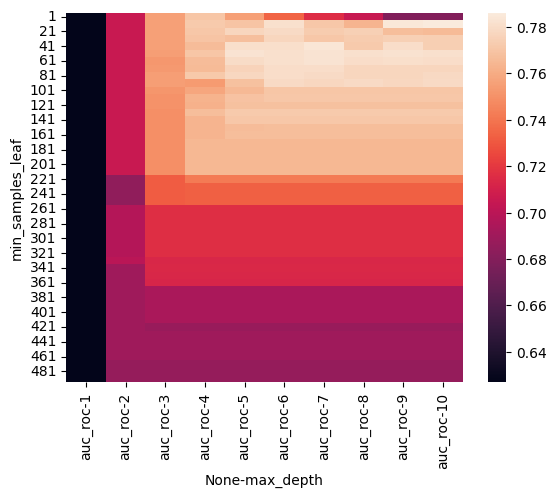

In [81]:
sns.heatmap(df_scores_pivot, annot=False, fmt=".3f")

In [82]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=41)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=41)

In [84]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- seniority <= 5.50
|   |--- records=no <= 0.50
|   |   |--- amount <= 1585.00
|   |   |   |--- income <= 149.00
|   |   |   |   |--- assets <= 2250.00
|   |   |   |   |   |--- age <= 32.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  32.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- assets >  2250.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- income >  149.00
|   |   |   |   |--- class: 0
|   |   |--- amount >  1585.00
|   |   |   |--- class: 1
|   |--- records=no >  0.50
|   |   |--- income <= 100.50
|   |   |   |--- time <= 27.00
|   |   |   |   |--- class: 0
|   |   |   |--- time >  27.00
|   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |--- assets <= 3750.00
|   |   |   |   |   |   |--- income <= 72.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- income >  72.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- assets >  3750.00
|   |   |   |   |   |   |--- income <= 49.50
|   |

c:\Users\soumy\anaconda3\envs\mlops\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Ensembles - Random Forest